In [2]:
import geopandas as gpd

In [3]:
gdf = gpd.read_file("data/otherdata/cities_geo.geojson")

In [4]:
gdf.head()

,Country,City,Population,Latitude,Longitude,geometry
0,cn,shanghai,14608512,31.045556,121.399722,POINT (121.39972 31.04556)
1,br,sao paulo,10021437,-23.473293,-46.665803,POINT (-46.66580 -23.47329)
2,cd,kinshasa,7787832,-4.300000,15.300000,POINT (15.30000 -4.30000)
3,eg,cairo,7734602,30.050000,31.250000,POINT (31.25000 30.05000)
4,cn,peking,7480601,39.928889,116.388333,POINT (116.38833 39.92889)


In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Country     16 non-null     object  
 1   City        16 non-null     object  
 2   Population  16 non-null     int64   
 3   Latitude    16 non-null     float64 
 4   Longitude   16 non-null     float64 
 5   geometry    16 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 900.0+ bytes


GEOSERIES AND GEODATAFRAME

In [6]:
gdf['geometry']

0      POINT (121.39972 31.04556)
1     POINT (-46.66580 -23.47329)
2       POINT (15.30000 -4.30000)
3       POINT (31.25000 30.05000)
4      POINT (116.38833 39.92889)
5       POINT (-0.09369 51.51412)
6       POINT (-74.06283 4.64918)
7       POINT (90.40861 23.72306)
8     POINT (-43.23333 -22.90000)
9     POINT (-70.66667 -33.45000)
10     POINT (-79.41667 43.66667)
11    POINT (151.20548 -33.86148)
12     POINT (114.27340 30.58012)
13     POINT (106.55278 29.56278)
14      POINT (29.91917 31.19806)
15      POINT (31.25000 30.05000)
Name: geometry, dtype: geometry

In [7]:
type(gdf['geometry'])

geopandas.geoseries.GeoSeries

In [8]:
type(gdf['Population'])

# the presence of a geometry column in the dataset automatically converts the dataset to a geodataframe

pandas.core.series.Series

SHAPELY FUNCTIONS WITH GEOPANDAS

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
gdf[gdf['City'] == 'shanghai']


,Country,City,Population,Latitude,Longitude,geometry
0,cn,shanghai,14608512,31.045556,121.399722,POINT (121.39972 31.04556)


In [11]:
gdf[gdf['Country'] == "cn"] [["Country","Latitude", "Longitude"]]

,Country,Latitude,Longitude
0,cn,31.045556,121.399722
4,cn,39.928889,116.388333
12,cn,30.580125,114.273405
13,cn,29.562778,106.552778


In [12]:
cn_geom  = gdf[gdf['City'] == 'shanghai']
cn_geom

,Country,City,Population,Latitude,Longitude,geometry
0,cn,shanghai,14608512,31.045556,121.399722,POINT (121.39972 31.04556)


In [13]:
cn_geom.buffer(20)

C:\Users\chira\AppData\Local\Temp\ipykernel_24112\3243744803.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cn_geom.buffer(20)


0    POLYGON ((141.39972 31.04556, 141.30342 29.085...
dtype: geometry

C:\Users\chira\AppData\Local\Temp\ipykernel_24112\2836438521.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cn_geom.buffer(20).plot()


<Axes: >

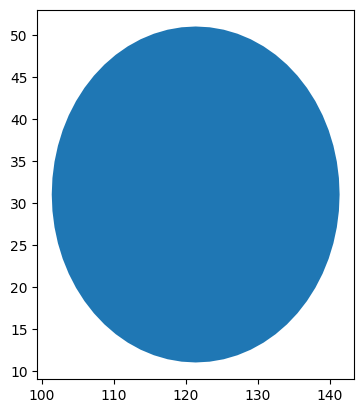

In [14]:
cn_geom.buffer(20).plot()

<Axes: >

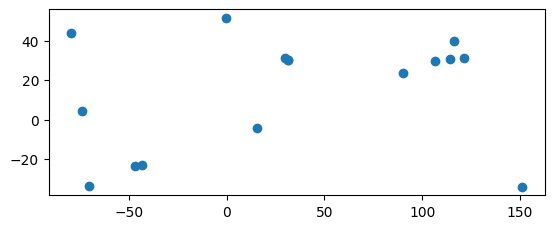

In [15]:
gdf.plot()

POLYGON READING WITH GEOPANDAS

In [16]:
netherlands = gpd.read_file("data/otherdata/netherlands.geojson")
netherlands

,name,geometry
0,Netherlands,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ..."


In [18]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon

In [28]:
path = 'data/modelskiAncientV2.csv'
df = pd.read_csv(path, encoding="ISO-8859-1")
df.head()

,City,OtherName,Country,Latitude,Longitude,Certainty,BC_3700,BC_3500,BC_3300,BC_3000,...,AD_100,AD_200,AD_300,AD_400,AD_500,AD_600,AD_700,AD_800,AD_900,AD_1000
0,Adab,NaN,Iraq,31.94700807,45.968421,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akkad,NaN,Iraq,32.77156192,44.320459,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri,NaN,Greece,36.351389,25.403611,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Akshak,NaN,Iraq,33.94720142,44.244717,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Al Ahsa,NaN,Saudi Arabia,25.429444,49.621944,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0


In [29]:
for x, y in zip(df["Longitude"], df["Latitude"]):
    print(x,y)

45.96842134 31.94700807
44.32045916 32.77156192
25.403611 36.351389
44.24471719 33.94720142
49.621944 25.429444
37.166667 36.216667
29.918739 31.200092
103.86705 13.412417
43.567128 40.501381
52.40857658 30.01201958
36.15722 36.20655
80.383333 8.35
115.599 28.8389
113.65 34.766667
36.40475674 35.41853326
43.2625 35.456667
23.71622 37.97945
31.82221773 30.78629566
44.420833 32.536389
46.004444 31.766667
44.40088 33.34058
47.816667 30.5
112.783333 34.733333
64.422347 39.765869
31.24967 30.06263
14.22013 41.09971
-88.5707 20.6792
38.015 36.829722
10.330833 36.858056
104.06667 30.66667
-4.893564 38.046133
44.58006701 33.09378746
100.267638 25.606486
36.29128 33.5102
113.3 40.083333
70.216667 23.886111
50.49894117 26.12163972
48.520833 32.008333
36.79872812 35.79839754
48.51738769 34.8053317919 
38.8 37.15
32.883333 24.083333
27.34104109 37.94049284
45.99607031 30.8158379
112.697078 34.701758
51.679192 32.651389
44.728333 33.484167
46.1754283 31.56002579
113.25 23.11667
114.483333 36.6
72.8

In [31]:
# Changing Dtype from Object to Float
# first we need to check its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       154 non-null    object 
 1   OtherName  74 non-null     object 
 2   Country    154 non-null    object 
 3   Latitude   154 non-null    object 
 4   Longitude  154 non-null    float64
 5   Certainty  154 non-null    int64  
 6   BC_3700    1 non-null      float64
 7   BC_3500    3 non-null      float64
 8   BC_3300    4 non-null      float64
 9   BC_3000    6 non-null      float64
 10  BC_2800    14 non-null     float64
 11  BC_2500    22 non-null     float64
 12  BC_2400    24 non-null     float64
 13  BC_2300    24 non-null     float64
 14  BC_2200    17 non-null     float64
 15  BC_2100    17 non-null     float64
 16  BC_2000    19 non-null     float64
 17  BC_1900    15 non-null     float64
 18  BC_1800    22 non-null     float64
 19  BC_1700    12 non-null     float64
 20  BC_1600   

In [32]:
# changing the columns Dtype to Float
df["Latitude"] = df["Latitude"].astype("Float64")

In [33]:
# changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       154 non-null    object 
 1   OtherName  74 non-null     object 
 2   Country    154 non-null    object 
 3   Latitude   154 non-null    Float64
 4   Longitude  154 non-null    float64
 5   Certainty  154 non-null    int64  
 6   BC_3700    1 non-null      float64
 7   BC_3500    3 non-null      float64
 8   BC_3300    4 non-null      float64
 9   BC_3000    6 non-null      float64
 10  BC_2800    14 non-null     float64
 11  BC_2500    22 non-null     float64
 12  BC_2400    24 non-null     float64
 13  BC_2300    24 non-null     float64
 14  BC_2200    17 non-null     float64
 15  BC_2100    17 non-null     float64
 16  BC_2000    19 non-null     float64
 17  BC_1900    15 non-null     float64
 18  BC_1800    22 non-null     float64
 19  BC_1700    12 non-null     float64
 20  BC_1600   

In [34]:
for x, y in zip(df["Longitude"], df["Latitude"]):
    print(Point(x,y))

POINT (45.96842134 31.94700807)
POINT (44.32045916 32.77156192)
POINT (25.403611 36.351389)
POINT (44.24471719 33.94720142)
POINT (49.621944 25.429444)
POINT (37.166667 36.216667)
POINT (29.918739 31.200092)
POINT (103.86705 13.412417)
POINT (43.567128 40.501381)
POINT (52.40857658 30.01201958)
POINT (36.15722 36.20655)
POINT (80.383333 8.35)
POINT (115.599 28.8389)
POINT (113.65 34.766667)
POINT (36.40475674 35.41853326)
POINT (43.2625 35.456667)
POINT (23.71622 37.97945)
POINT (31.82221773 30.78629566)
POINT (44.420833 32.536389)
POINT (46.004444 31.766667)
POINT (44.40088 33.34058)
POINT (47.816667 30.5)
POINT (112.783333 34.733333)
POINT (64.422347 39.765869)
POINT (31.24967 30.06263)
POINT (14.22013 41.09971)
POINT (-88.5707 20.6792)
POINT (38.015 36.829722)
POINT (10.330833 36.858056)
POINT (104.06667 30.66667)
POINT (-4.893564 38.046133)
POINT (44.58006701 33.09378746)
POINT (100.267638 25.606486)
POINT (36.29128 33.5102)
POINT (113.3 40.083333)
POINT (70.216667 23.886111)
POINT

LONG WAY OF CREATING GEODATAFRAME

In [40]:
# create geometry list
geometry = []

for x, y in zip(df["Longitude"], df["Latitude"]):
    geometry.append(Point(x,y))
geometry[:4]

[<POINT (45.968 31.947)>,
 <POINT (44.32 32.772)>,
 <POINT (25.404 36.351)>,
 <POINT (44.245 33.947)>]

In [41]:
# alternative way

geometry_list = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geometry_list[:4]

[<POINT (45.968 31.947)>,
 <POINT (44.32 32.772)>,
 <POINT (25.404 36.351)>,
 <POINT (44.245 33.947)>]

In [42]:
# add crs
crs = "EPSG:4326"

In [44]:
# geodatframe finally 

gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry_list)
gdf.head()

,City,OtherName,Country,Latitude,Longitude,Certainty,BC_3700,BC_3500,BC_3300,BC_3000,...,AD_200,AD_300,AD_400,AD_500,AD_600,AD_700,AD_800,AD_900,AD_1000,geometry
0,Adab,NaN,Iraq,31.947008,45.968421,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (45.96842 31.94701)
1,Akkad,NaN,Iraq,32.771562,44.320459,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (44.32046 32.77156)
2,Akrotiri,NaN,Greece,36.351389,25.403611,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (25.40361 36.35139)
3,Akshak,NaN,Iraq,33.947201,44.244717,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (44.24472 33.94720)
4,Al Ahsa,NaN,Saudi Arabia,25.429444,49.621944,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,POINT (49.62194 25.42944)


<Axes: >

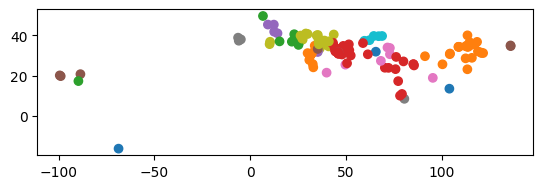

In [46]:
gdf.plot("Country")

SHORT WAY OF CREATING GEODATAFRAMES

In [47]:
# using gpd.points_from_xy()
gdf_short = gpd.GeoDataFrame(df, crs=crs, geometry= gpd.points_from_xy(df["Latitude"], df["Longitude"]))
gdf_short.head()

,City,OtherName,Country,Latitude,Longitude,Certainty,BC_3700,BC_3500,BC_3300,BC_3000,...,AD_200,AD_300,AD_400,AD_500,AD_600,AD_700,AD_800,AD_900,AD_1000,geometry
0,Adab,NaN,Iraq,31.947008,45.968421,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (31.94701 45.96842)
1,Akkad,NaN,Iraq,32.771562,44.320459,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (32.77156 44.32046)
2,Akrotiri,NaN,Greece,36.351389,25.403611,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (36.35139 25.40361)
3,Akshak,NaN,Iraq,33.947201,44.244717,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (33.94720 44.24472)
4,Al Ahsa,NaN,Saudi Arabia,25.429444,49.621944,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,POINT (25.42944 49.62194)


geopandas geometries from polygon

In [ ]:
# polygon_coordinates = [list of polygon coordinates]
# didnt have the coordinates so i improvised

In [ ]:
# next is to create Polygon Geometry with list comprehension
""" 
polygon_geometry = [Polygon(coords) for coords in polygon_coordinates]
"""
# next create a geodataframe
"""
gdf_polygon = gpd.GeoDataFrame({"Country":["Netherlands", "Germany"]}, crs=crs, geometry = polygon_geometry)
"""